# Predicting Indoor Location Using WiFi Fingerprinting
## Submitted by Caroline Katba


Email: katba.caroline@gmail.com,
[Website](http://katba-caroline.com/),
[Github](https://github.com/Katba-Caroline),
[LinkedIn](https://www.linkedin.com/in/caroline-katba-97216067/).

### Notebook Table of Contents
- Capstone Project
    - Exploratory Data Analysis (EDA)
    - Preprocessing
    - Model Applications
    - Model Predictions
    - Model Predictions on Validation Data 
       


# Capstone Project: Predicting indoor location using WiFi fingerprinting

Many businesses and service providers rely on localization services in order to better serve their patrons. Thanks to the inclusion of GPS sensors in mobile devices, Outdoor localization problems have been solved in a variety of ways and very accurately. However, indoor localization is still an open problem mainly due to the loss of GPS signal in indoor environments.
Therefore, the problem of indoor localization has recently garnered increased attention from researchers who have opted to focus more on cheaper software solutions in place of expensive hardware solutions. 

Indoor localization has many use cases and exhibits great potential for solving problems in:
- Indoor navigation for humans and robots
- Targeted advertising 
- Emergency response
- Assisted living 

**Data**

This data set is still unfortunately one of a kind and was recently presented by Joaquín Torres-Sospedra, Raúl Montoliu, Adolfo Martínez-Usó, Tomar J. Arnau, Joan P. Avariento, Mauri Benedito-Bordonau, Joaquín Huerta [UJIIndoorLoc: A New Multi-building and Multi-floor Database for WLAN Fingerprint-based Indoor Localization Problems In Proceedings of the Fifth International Conference on Indoor Positioning and Indoor Navigation, 2014.](https://www.ncbi.nlm.nih.gov/pubmed/28287447)

The UJIIndoorLoc database covers three buildings of Universitat Jaume I with 4 or more floors and almost 110.000 m2. It was created in 2013 by means of more than 20 different users and 25 Android devices. The database consists of 19,937 training/reference records (trainingData.csv file) and 1111 validation/test records (validationData.csv file).

The 529 attributes contain the WiFi fingerprint, the coordinates where it was taken, and other useful information. Each WiFi fingerprint can be characterized by the detected Wireless Access Points (WAPs) and the corresponding Received Signal Strength Intensity (RSSI). The intensity values are represented as negative integer values ranging -104dBm (extremely poor signal) to 0dbM. The positive value 100 is used to denote when a WAP was not detected. During the database creation, 520 different WAPs were detected. Thus, the WiFi fingerprint is composed by 520 intensity values.

**Approaches in the Literature**


Although available Data for indoor localization has unfortunately been scant, many have used this data to solve several problems in a variety of ways. Those approaches include the following: 

- Location identification using regression techniques
- Floor positioning using classification
- Building recognition using deep learning models
- Trajectory tracking using a combination of the above methods
- read more [here](https://www.ncbi.nlm.nih.gov/pubmed/28287447)

**Literature on Indoor Localization**


Here are several of the papers available on the topic that helped me in my research:
- [WaP: Indoor localization and tracking using WiFi-Assisted Particle filter](https://www.researchgate.net/publication/286669860_WaP_Indoor_localization_and_tracking_using_WiFi-Assisted_Particle_filter)
- [Machine Learning for Indoor Localization
Using Mobile Phone-Based Sensors](https://arxiv.org/pdf/1505.06125.pdf)
- [Low-effort place recognition with WiFi
fingerprints using deep learning](https://arxiv.org/pdf/1611.02049v1.pdf)
- [Indoor Location Prediction Using Multiple Wireless Received
Signal Strengths](https://pdfs.semanticscholar.org/837a/2fd3f8012519707e23b2aee0850d457c950e.pdf)
- [Reliable indoor location prediction using conformal
prediction](http://khuong.uk/Papers/reliable_indoor_journal.pdf)
- [Indoor Localization using Place and Motion Signatures](https://pdfs.semanticscholar.org/2a24/2b0e4d4468946a51282fc6c1b728c8308f34.pdf)

**My Approach: Multi-label Classification**

To my knowledge, my approach is a unique approach that has not been applied to the problem before. I treat the problem as a classification problem, but with a twist that can save time, effort and precious memory. I treat this problem as a Multi-Label Classification problem, wherein my model simultaneously predicts *Building ID and Floor ID* for a given input. 
Using a combination of Principal Component Analysis (PCA) and Multi-Label K Nearest Neighbor (MLKNN) algorithms, the model is able to predict the Building ID AND Floor ID simultaneously with 98.7% accuracy score and 0.003 Hamming loss. 
This model can also be expanded to include Space ID as well.
 

The "Difference between multi-class classification & multi-label classification is that in multi-class problems the classes are mutually exclusive, whereas for multi-label problems each label represents a different classification task, but the tasks are somehow related." read more [here.](https://towardsdatascience.com/journey-to-the-center-of-multi-label-classification-384c40229bff)

Although many of the previosuly mentioned approaches yielded excellent results, many of them relied on predicting only one independent variable at a time regardless of the technique. For example, predicting only the building ID or the floor ID independently. In my opinion creating separate models for such a prediction task can be quite costly in terms of compute power, memory and time savings. Especially when using Neural Networks which can require great computational powers. Such losses, especially in time can be even deadly. Imagine a fire on the 4th floor of a particular building in a university. Having a model that can accurately and quickly predict how many people are in that exact area can be tremendously helpful to emergency response personnel.



**Literature on Multi-Label Classification**

- [How Is a Data-Driven Approach Better than Random Choice in Label Space Division for Multi-Label Classification?](https://www.mdpi.com/1099-4300/18/8/282/htm)
- [Multi-Label Classification Problem Analysis, Metrics and Techniques](https://www.springer.com/us/book/9783319411101)
- [ML-KNN: A lazy learning approach to multi-label learning](https://www.sciencedirect.com/science/article/abs/pii/S0031320307000027)
- [Multi-label Classification: Problem Transformation methods in
Tamil Phoneme classification](https://www.sciencedirect.com/science/article/pii/S1877050917319440)
- [Multi-label Classification: A Comparative Study on
Threshold Selection Methods](http://dmip.webs.upv.es/LMCE2014/Papers/lmce2014_submission_11.pdf)
- [A Tutorial on Multi-label Classification Techniques](https://www.researchgate.net/publication/225379571_A_Tutorial_on_Multi-label_Classification_Techniques)
- [Multi-Label Classification of Music Into Emotions](http://lpis.csd.auth.gr/publications/tsoumakas-ismir08.pdf)


**Capstone Project Table of Contents**
- Exploratory Data Analysis (EDA)
- Preprocessing
- Model Applications
- Model Predictions
- Model Predictions for Validation Data 
    - I tested the model on the validation data set, a completely new and unseen data set to test the model.

# Capstone Project: Predicting Indoor Location Using WiFi Fingerprinting

In [3]:
#necessary Libraries
import numpy as np
import pandas as pd
import time
import pprint

#Visualizations
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
# magic word for producing visualizations in notebook
%matplotlib inline


#Preprocessing
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
from scipy.sparse import lil_matrix

#Models
from sklearn.naive_bayes import GaussianNB
from skmultilearn.problem_transform import BinaryRelevance
from skmultilearn.problem_transform import ClassifierChain
from skmultilearn.problem_transform import LabelPowerset
from skmultilearn.adapt import MLkNN

#Scoring Metrics
from sklearn.model_selection import GridSearchCV
import sklearn.metrics as metrics
from sklearn.metrics import f1_score, fbeta_score
from sklearn.metrics import accuracy_score

# EDA: Exploratory Data Analysis

In [4]:
# Load the dataset
trainingData = pd.read_csv("trainingData.csv")

In [5]:
# Check the structure of the data after it's loaded 
#(print the number of rows and columns).
num_rows, num_cols  = trainingData.shape
print('Number of columns: {}'.format(num_cols))
print('Number of rows: {}'.format(num_rows))

Number of columns: 529
Number of rows: 19937


In [4]:
#check the statistics of the data per columns
trainingData.describe()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP520,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP
count,19937.000000,19937.000000,19937.0,19937.0,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,...,19937.0,19937.000000,1.993700e+04,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,1.993700e+04
mean,99.823644,99.820936,100.0,100.0,99.613733,97.130461,94.733661,93.820234,94.693936,99.163766,...,100.0,-7464.275947,4.864871e+06,1.674575,1.212820,148.429954,1.833024,9.068014,13.021869,1.371421e+09
std,5.866842,5.798156,0.0,0.0,8.615657,22.931890,30.541335,33.010404,30.305084,12.634045,...,0.0,123.402010,6.693318e+01,1.223078,0.833139,58.342106,0.372964,4.988720,5.362410,5.572054e+05
min,-97.000000,-90.000000,100.0,100.0,-97.000000,-98.000000,-99.000000,-98.000000,-98.000000,-99.000000,...,100.0,-7691.338400,4.864746e+06,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.369909e+09
25%,100.000000,100.000000,100.0,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.0,-7594.737000,4.864821e+06,1.000000,0.000000,110.000000,2.000000,5.000000,8.000000,1.371056e+09
50%,100.000000,100.000000,100.0,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.0,-7423.060900,4.864852e+06,2.000000,1.000000,129.000000,2.000000,11.000000,13.000000,1.371716e+09
75%,100.000000,100.000000,100.0,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.0,-7359.193000,4.864930e+06,3.000000,2.000000,207.000000,2.000000,13.000000,14.000000,1.371721e+09
max,100.000000,100.000000,100.0,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.0,-7300.818990,4.865017e+06,4.000000,2.000000,254.000000,2.000000,18.000000,24.000000,1.371738e+09


In [5]:
trainingData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19937 entries, 0 to 19936
Columns: 529 entries, WAP001 to TIMESTAMP
dtypes: float64(2), int64(527)
memory usage: 80.5 MB


In [6]:
#Check the columns names
col_names = trainingData.columns.values
col_names

array(['WAP001', 'WAP002', 'WAP003', 'WAP004', 'WAP005', 'WAP006',
       'WAP007', 'WAP008', 'WAP009', 'WAP010', 'WAP011', 'WAP012',
       'WAP013', 'WAP014', 'WAP015', 'WAP016', 'WAP017', 'WAP018',
       'WAP019', 'WAP020', 'WAP021', 'WAP022', 'WAP023', 'WAP024',
       'WAP025', 'WAP026', 'WAP027', 'WAP028', 'WAP029', 'WAP030',
       'WAP031', 'WAP032', 'WAP033', 'WAP034', 'WAP035', 'WAP036',
       'WAP037', 'WAP038', 'WAP039', 'WAP040', 'WAP041', 'WAP042',
       'WAP043', 'WAP044', 'WAP045', 'WAP046', 'WAP047', 'WAP048',
       'WAP049', 'WAP050', 'WAP051', 'WAP052', 'WAP053', 'WAP054',
       'WAP055', 'WAP056', 'WAP057', 'WAP058', 'WAP059', 'WAP060',
       'WAP061', 'WAP062', 'WAP063', 'WAP064', 'WAP065', 'WAP066',
       'WAP067', 'WAP068', 'WAP069', 'WAP070', 'WAP071', 'WAP072',
       'WAP073', 'WAP074', 'WAP075', 'WAP076', 'WAP077', 'WAP078',
       'WAP079', 'WAP080', 'WAP081', 'WAP082', 'WAP083', 'WAP084',
       'WAP085', 'WAP086', 'WAP087', 'WAP088', 'WAP089', 'WAP0

In [7]:
#check for missing values
missing_values_count = trainingData.isnull().sum()
#uncomment this if you want to see the count of missing data per column
#missing_values_count

# how many total missing values do we have?
total_cells = np.product(trainingData.shape)
total_missing = missing_values_count.sum()

# percent of data that is missing
missing_percent = (total_missing/total_cells) * 100

print('Percent of missing data = {}%'.format(missing_percent))

Percent of missing data = 0.0%


**Comment:** This information is not quite true, we have quite a bit of information missing in the WAP Columns. However, given the sparse disrtibution of WAP data, I would like to preserve those values as they are for now, there will be more feature engineering later.

In [8]:
#Assess unique values per building columns
unique_floors = trainingData["FLOOR"].unique()
unique_bldgs = trainingData["BUILDINGID"].unique()
unique_spaceid = trainingData["SPACEID"].unique()
unique_rpos = trainingData["RELATIVEPOSITION"].unique()
unique_users = trainingData["USERID"].unique()
print('Unique Floors : {}'.format(unique_floors))
print('Unique Buildings : {}'.format(unique_bldgs))
print('Unique Space IDs : {}'.format(unique_spaceid))
print('Unique Relative Positions : {}'.format(unique_rpos))
print('Unique Users : {}'.format(unique_users))


Unique Floors : [2 0 3 4 1]
Unique Buildings : [1 0 2]
Unique Space IDs : [106 103 102 122 105 101 112 104 110 108 109 111 107  15  29 117  16  28
  22  10   2   4   3   5   6   9  27   8   7  26  18 216  17 217 247 248
 246 245 244 243 242 241 240 201 202 204 203 205 207 206 209 211 208 210
 212 214 213 215 121 219 221 222 218 220 250 223 225 224 229 226 227 228
 233 231 230 232 236 235 234 237 238 239 141 140 143 113 114 116 115 120
 118 128 119 129 125 124 131 127 132 126 133 134 137 135 136 253 254 123
 130 138 139 142 146 147 249 144   1  30  25  13  12  11  14]
Unique Relative Positions : [2 1]
Unique Users : [ 2 11  3  4  5  6  7  8  9 16 10 12 13 14 15  1 17 18]


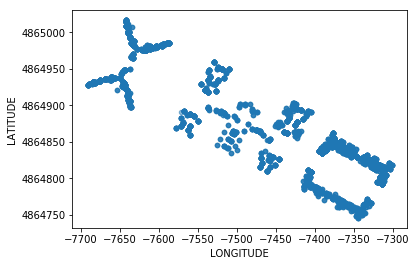

In [9]:
#Map the data i.e. see the campus
trainingData.plot(kind="scatter", x="LONGITUDE", y="LATITUDE", alpha=0.2)
plt.savefig('data_map.png')

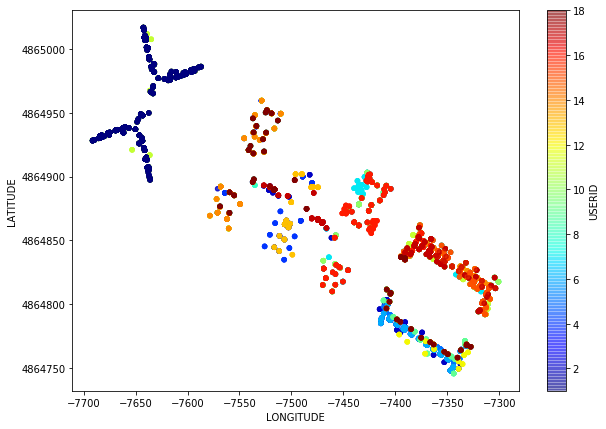

In [10]:
#map the data by user ID
#i.e. see how much of the information in each building was collected by how many users
trainingData.plot(kind="scatter", x="LONGITUDE", y="LATITUDE", alpha=0.4, figsize=(10,7),
    c="USERID", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.savefig('user_map2.png')

**Comment:** We can clearly see that the data in each building was collected by only a handful of the users and that not all users walked around all buildings. This can result in highly skewed data, therefore, I will choose to discard of the User ID variable. 

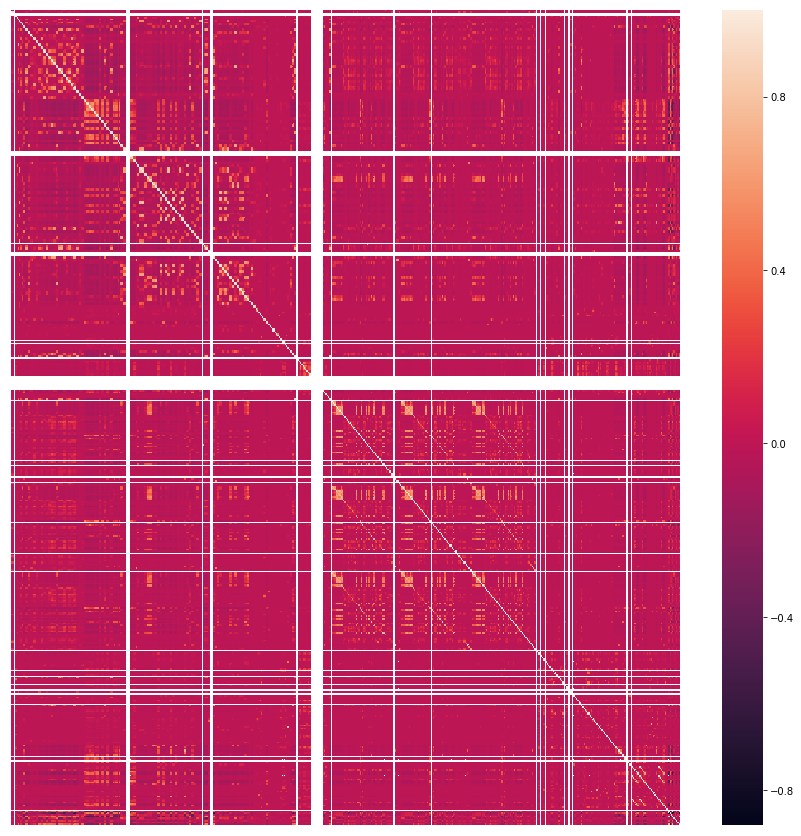

In [11]:
# plot the correlations between the WAP features
corr_matrix = trainingData.corr()
fig = plt.figure(figsize=(15,15))
sns.heatmap(corr_matrix,xticklabels=False, yticklabels=False)

**Comment:** While checking the correlation between WAP inputs, we can see small pockets of correlation between the data. However, most of the data is not highly correlated and will not affect our classification accuracy per se. Nevertheless, to avoid the [curse of dimentionality](https://en.wikipedia.org/wiki/Curse_of_dimensionality#Nearest_neighbor_search), I will reduce the number of features by using PCA.

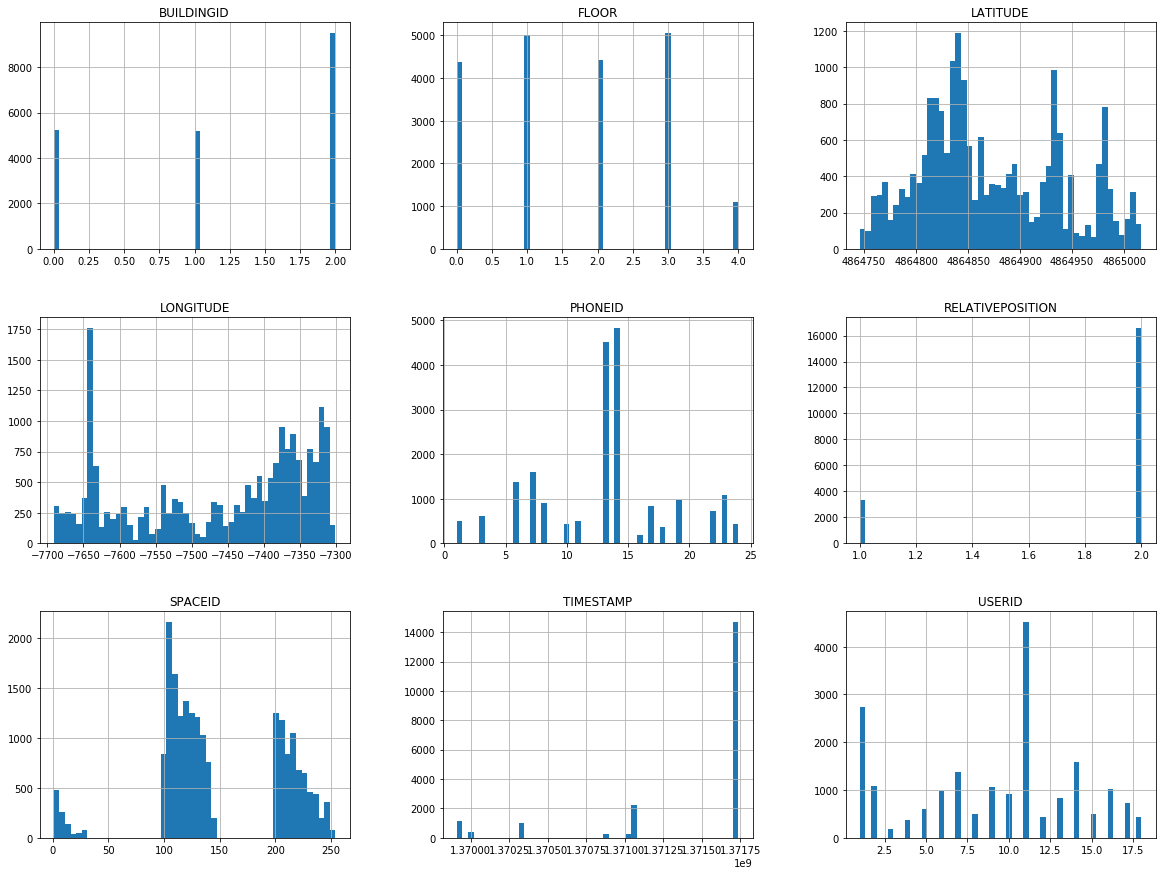

In [12]:
# plot the histograms of the attributes
trainingData.iloc[:, 520:529].hist(bins=50, figsize=(20,15))
plt.savefig("attribute_histogram_plots")
plt.show()

**Comment:** The plots illustrate the distributions of the data. Most of the attributes have a multinomial distribution. The only variety presented in the distributions, is that of the Longitude and Latitude. Those values seem to have more a skewed normal distribution, however, those values if predicted alone cannot provide adequate information. Therefore, We would have to have the same level of confidence in a Lat regression analysis predictions as the Long regression analysis prediction to pair them together. Given this complexity, I will choose to classify the Building and Floor IDs.

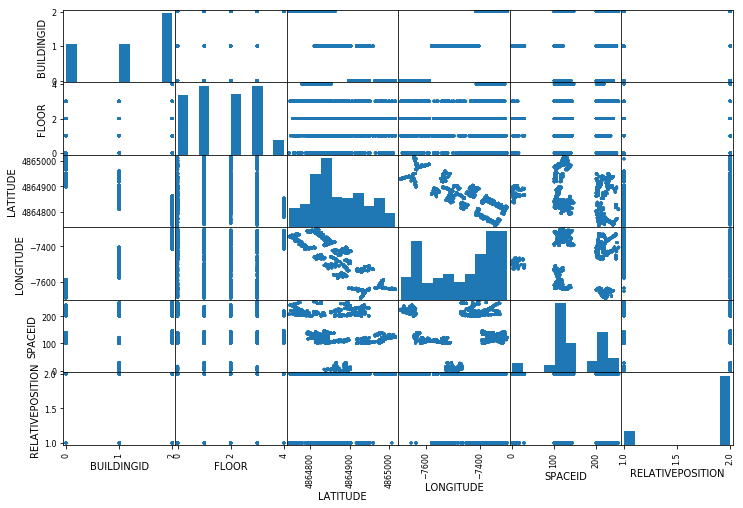

In [161]:
attributes = ["BUILDINGID","FLOOR", "LATITUDE", "LONGITUDE", "SPACEID", "RELATIVEPOSITION"]
scatter_matrix(trainingData[attributes], figsize=(12, 8))
plt.savefig('matrix.png')

**Comment:** These plots help us better understand the relationships between the potential target attributes. In this particular case, there is not much that can be inferred from these plots, except that there are no linear relationships between any of those attributes. 

# Preprocessing 
## Preprocess the Training Data Set

In [8]:
# Load the dataset
trainingData = pd.read_csv("trainingData.csv")

In [6]:
def clean_data(df):
    """
    Perform feature trimming, and engineering for trainingData
    Will also be applied to validationData
    
    INPUT: trainingData DataFrame
    OUTPUT: Trimmed and cleaned trainingData DataFrame
    """
    
    # Reverse the representation for the values. 100=0 and teh values range from 0-105 (weakest to strongest)
    #"The intensity values are represented as negative integer values ranging -104dBm (extremely poor signal) to 0dbM.
    #The positive value 100 is used to denote when a WAP was not detected."
    df.iloc[:, 0:520] = np.where(df.iloc[:, 0:520] <= 0, 
                df.iloc[:, 0:520] + 105, 
                df.iloc[:, 0:520] - 100)
    
    # remove selected columns... 
    columns_removed = ['USERID', 'PHONEID','TIMESTAMP']
    for col in columns_removed:
        df.drop(col, axis=1, inplace=True)
    
   
    # Return the cleaned dataframe.
    return df 


In [7]:
#Apply Cleaning

trainingData  = clean_data(trainingData)

In [8]:
def preprocess_data(df):
    """
    Separates trainingData into Features and Targets
    Will also be applied to validationData
    
    INPUT: Cleaned trainingData DataFrame
    OUTPUT: trainingData as Features and Targets
    """
    
    global X
    global y
    # split the data set into features and targets(Floor and BuildingID)
    X = df.drop(['LONGITUDE', 'LATITUDE','FLOOR','BUILDINGID', 'SPACEID','RELATIVEPOSITION'], axis=1)
    y = df[['BUILDINGID', 'FLOOR']]
    
    
    #create Dummies for the targets to feed into the model
    y = pd.get_dummies(data=y, columns=['BUILDINGID', 'FLOOR'])
    
    
    return X, y

In [9]:
#Apply preprocessing

X, y = preprocess_data(trainingData)

In [10]:
def split_data(preprocess_data):
# TO AVOID OVERFITTING: Split the training data into training and testing sets 
    global X_train
    global X_test
    global y_train
    global y_test
    
    X_train, X_test, y_train, y_test = train_test_split(X, 
                                                        y, 
                                                        test_size = 0.2, 
                                                        random_state = 42,
                                                        shuffle=True)

    # Show the results of the split
    print("Training set has {} samples.".format(X_train.shape[0]))
    print("Testing set has {} samples.".format(X_test.shape[0]))
    return X_train, X_test, y_train, y_test

In [11]:
#Apply split data

X_train, X_test, y_train, y_test = split_data(preprocess_data)

Training set has 15949 samples.
Testing set has 3988 samples.


**Comment:** Although the WAPS that is all contained within the same scale (0-105), it is still considered a good idea to standardize the data so that the variables with larger variances don't overwhelm the PCA analysis. Additionally, standardizing is preferred to MinMax scaling when computing PCA because we are interested in the components that maximize the variance. Therefore, I standardized our WAPs data so that those features will have a mean of 0 and standard deviation of 1. Read more [here](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html), and [here](https://www.quora.com/Minmaxscaler-vs-Standardscaler-Are-there-any-specific-rules-to-use-one-over-the-other-for-a-particular-application)

In [12]:
#Scale Data with Standard Scaler

scaler = StandardScaler()

#Fit only the training set
#this will help us transform the validation data 
scaler.fit(X_train)
    
# Apply transform to both the training set and the test set.
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

C:\Users\Frank the Tank\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Frank the Tank\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Frank the Tank\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  # This is added back by InteractiveShellApp.init_path()


In [13]:
#Apply PCA while keeping 95% of the variation in the data
pca = PCA(.95)

    
#Fit only the training set    
pca.fit(X_train)

# Apply PCA transform to both the training set and the test set.    
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

print("Number of PCA Components = {}.".format(pca.n_components_))
#print(pca.n_components_)
print("Total Variance Explained by PCA Components = {}.".format(pca.explained_variance_ratio_.sum()))
#print(pca.explained_variance_ratio_.sum())

Number of PCA Components = 258.
Total Variance Explained by PCA Components = 0.9501844395759895.



**Comment:** After applying PCA to our data, we can see that our features have been reduced from 520 to 258. I chose 95% of the total explained variance because it seemed like a close enough representation of the total variance.


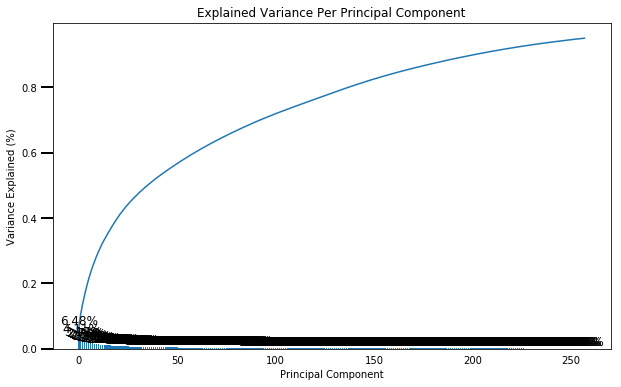

In [223]:
def pca_plot(pca):
    '''
    Creates a scree plot associated with the principal components 
    
    INPUT: pca - the result of instantian of PCA in scikit learn
            
    OUTPUT:
            None
    '''
    num_components = len(pca.explained_variance_ratio_)
    ind = np.arange(num_components)
    vals = pca.explained_variance_ratio_
 
    plt.figure(figsize=(10, 6))
    ax = plt.subplot(111)
    cumvals = np.cumsum(vals)
    ax.bar(ind, vals)
    ax.plot(ind, cumvals)
    for i in range(num_components):
        ax.annotate(r"%s%%" % ((str(vals[i]*100)[:4])), (ind[i]+0.2, vals[i]), va="bottom", ha="center", fontsize=12)
 
    ax.xaxis.set_tick_params(width=0)
    ax.yaxis.set_tick_params(width=2, length=12)
 
    ax.set_xlabel("Principal Component")
    ax.set_ylabel("Variance Explained (%)")
    plt.title('Explained Variance Per Principal Component')

pca_plot(pca)


**Comment:** Now that we have standardized our data and applied PCA to it, we must prepare the data for multilabel classification. It is recommended that the data be transformed into sparse matrices. Read more [here](http://scikit.ml/concepts.html)


In [14]:
#Create sparse matrices to run the scikit multilearn algorithms

X_train_pca = lil_matrix(X_train_pca).toarray()
y_train = lil_matrix(y_train).toarray()
X_test_pca = lil_matrix(X_test_pca).toarray()
y_test = lil_matrix(y_test).toarray()

# Model Applications

When solving multi-label classification problems, there are two approaches, a traditional one and an adaptive one.

- The traditional approach focuses on *problem transformation*. This approach transforms the multi-label classification problem into multiple single-label classification problems. Some of the algorithms include OneVsRest, Binary Relevance, Classifier Chains and Label Powerset.

- The algorithmic adaptive approach focuses on adapting the algorithm to the multi-label classification problem directly. 

In the following section, I applied both approaches to the problem to test for better performance and therefore better explanatory power.




## Problem Transformation
### 1. Binary Relevance
"Transforms a multi-label classification problem with L labels into L single-label separate binary classification problems using the same base classifier provided in the constructor. The prediction output is the union of all per label classifiers" Read more [here](http://scikit.ml/api/skmultilearn.problem_transform.br.html#skmultilearn.problem_transform.BinaryRelevance)

"This approach is popular because it is easy to implement, however it also ignores the possible correlations between class labels." Read more [here](https://towardsdatascience.com/journey-to-the-center-of-multi-label-classification-384c40229bff)

In [225]:
# using binary relevance
# initialize binary relevance multi-label classifier
# with a gaussian naive bayes base classifier
start_time = time.time()

BR_classifier = BinaryRelevance(GaussianNB())
# train
BR_classifier.fit(X_train, y_train)
# predict
predictions = BR_classifier.predict(X_test)
# accuracy
print("Accuracy = ",accuracy_score(y_test,predictions))

print("--- Run time: %s mins ---" % np.round(((time.time() - start_time)/60),2))

Accuracy =  0.1216148445336008
--- Run time: 0.08 mins ---


### 2. Classifier Chains
"Constructs a bayesian conditioned chain of per label classifiers. This class provides implementation of Jesse Read’s problem transformation method called Classifier Chains. For L labels it trains L classifiers ordered in a chain according to the Bayesian chain rule. The first classifier is trained just on the input space, and then each next classifier is trained on the input space and all previous classifiers in the chain." Read more [here](http://scikit.ml/api/skmultilearn.problem_transform.cc.html#skmultilearn.problem_transform.ClassifierChain)

"The total number of classifiers needed for this approach is equal to the number of classes, but the training of the classifiers is more involved" Read more [here](https://towardsdatascience.com/journey-to-the-center-of-multi-label-classification-384c40229bff)

In [226]:
# initialize classifier chains multi-label classifier
# with a gaussian naive bayes base classifier
start_time = time.time()

CC_classifier = ClassifierChain(GaussianNB())

# train
CC_classifier.fit(X_train, y_train)

# predict
predictions = CC_classifier.predict(X_test)

accuracy_score(y_test,predictions)
print('Test accuracy is {}'.format(accuracy_score(y_test, predictions)))

print("--- Run time: %s mins ---" % np.round(((time.time() - start_time)/60),2))

Test accuracy is 0.40722166499498497
--- Run time: 0.09 mins ---


### 3. Label Powerset
"Transform multi-label problem to a multi-class problem. Label Powerset is a problem transformation approach to multi-label classification that transforms a multi-label problem to a multi-class problem with 1 multi-class classifier trained on all unique label combinations found in the training data. The method maps each combination to a unique combination id number, and performs multi-class classification using the classifier as multi-class classifier and combination ids as classes." Read more [here](http://scikit.ml/api/skmultilearn.problem_transform.lp.html#skmultilearn.problem_transform.LabelPowerset)

"This approach does take possible correlations between class labels into account. More commonly this approach is called the label-powerset method, because it considers each member of the power set of labels in the training set as a single label. However when the number of classes increases the number of distinct label combinations can grow exponentially. This easily leads to combinatorial explosion and thus computational infeasibility.  " Read more [here](https://towardsdatascience.com/journey-to-the-center-of-multi-label-classification-384c40229bff)

In [227]:
# initialize Label Powerset multi-label classifier
# with a gaussian naive bayes base classifier
start_time = time.time()

LP_classifier = LabelPowerset(GaussianNB())

# train
LP_classifier.fit(X_train, y_train)

# predict
predictions = LP_classifier.predict(X_test)

accuracy_score(y_test,predictions)
print('Test accuracy is {}'.format(accuracy_score(y_test, predictions)))

print("--- Run time: %s mins ---" % np.round(((time.time() - start_time)/60),2))

Test accuracy is 0.525827482447342
--- Run time: 0.03 mins ---


## Adaptive Algorithms
### Multi-Label K-Nearest Neighbors (ML-KNN)
"MLkNN builds uses k-NearestNeighbors find nearest examples to a test class and uses Bayesian inference to select assigned labels." Read more [here](http://scikit.ml/api/skmultilearn.adapt.mlknn.html#multilabel-k-nearest-neighbours)

"In detail, for each unseen instance, its k nearest neighbors in the training set are firstly identified. After that, based on statistical information gained from the label sets of these neighboring instances, i.e. the number of neighboring instances belonging to each possible class, maximum a posteriori (MAP) principle is utilized to determine the label set for the unseen instance." Read more [here](https://www.semanticscholar.org/paper/ML-KNN%3A-A-lazy-learning-approach-to-multi-label-Zhang-Zhou/572b7f31aee095262057fe17b181ac262eb94995)

In [15]:
start_time = time.time()

MLKNN_classifier = MLkNN(k=3)

# train
MLKNN_classifier.fit(X_train_pca, y_train)

# predict mlknn =3
predictions = MLKNN_classifier.predict(X_test_pca)

# accuracy
print("Accuracy = ",accuracy_score(y_test,predictions))

print("--- Run time: %s mins ---" % np.round(((time.time() - start_time)/60),2))

Accuracy =  0.9839518555667001
--- Run time: 1.73 mins ---


**Comment:** This model MLKNN is clearly the best model we have so far, the explanatory power is surging at 98% accuracy score. Timing wise, it is not as fast as the other problem transformation models, however, MLKNN is the best at prediction power. 

## HyperParameter Tuning
Given that we have selected MLKNN classifier to solve our problem, I will run a grid search to find the most optimal parameters for our model. **Caution** This operation takes quite some time because it will build a model for each parameter combination possible.

In [248]:
#This is takes a long time to run
#Find the optimal set of parameters

start_time = time.time()

parameters = {'k': range(1,4), 's': [0.5, 0.7, 1.0]}

score = 'accuracy'


clf = GridSearchCV(MLkNN(), parameters, scoring=score, cv=5)
clf.fit(X_train_pca, y_train)

print (clf.best_params_, clf.best_score_)
print("--- Run time: %s mins ---" % np.round(((time.time() - start_time)/60),2))

{'k': 1, 's': 0.5} 0.987710828265095
--- Run time: 69.99 mins ---


**Comment:** Now that we have the most optimal parameters, I will rerun the MLKNN model to fit the data with the new parameters where K=1.

In [16]:
start_time = time.time()

MLKNN_1_classifier = MLkNN(k=1)

# train
MLKNN_1_classifier.fit(X_train_pca, y_train)

#run predictions
# predict mlknn =1
predictions = MLKNN_1_classifier.predict(X_test_pca)

# accuracy
print("Accuracy = ",accuracy_score(y_test,predictions))


print("--- Run time: %s mins ---" % np.round(((time.time() - start_time)/60),2))

Accuracy =  0.9869608826479438
--- Run time: 0.47 mins ---


**Comment:** Incredible results. After tuning our hyperparameters, our model yield a 98.7% accuracy results up from 98.4% where K was equal to 3. 

## Scoring the best model
- Hamming Loss: The Hamming loss is the fraction of labels that are incorrectly predicted.
- Accuracy Score: In multilabel classification, this function computes subset accuracy: the set of labels predicted for a sample must exactly match the corresponding set of labels in y_true.


In [250]:
#The Hamming loss is the fraction of labels that are incorrectly predicted.
print("Hamming Loss = ",metrics.hamming_loss(y_test, predictions))

Hamming Loss =  0.0036985957873620864


In [251]:
#In multilabel classification, this function computes subset accuracy: the set of labels predicted for a sample must exactly match the corresponding set of labels in y_true.
print("Accuracy = ",metrics.accuracy_score(y_test, predictions))

Accuracy =  0.9869608826479438


## Pickle Model using Joblib
"It may be better to use joblib’s replacement of pickle (dump & load), which is more efficient on objects that carry large numpy arrays internally as is often the case for fitted scikit-learn estimators, but can only pickle to the disk and not to a string." Read more [here](https://scikit-learn.org/stable/modules/model_persistence.html)

In [18]:
#pickle model first

from joblib import dump, load
dump(MLKNN_1_classifier, 'MLKNN_1_classifier.joblib')

['MLKNN_1_classifier.joblib']

## Load Pickled Model for Prediction

In [19]:
#load pickled model
MLKNN_1_classifier = load('MLKNN_1_classifier.joblib') 

In [20]:
#run predictions on our test data
# predict mlknn =1
predictions = MLKNN_1_classifier.predict(X_test_pca)

# accuracy
print("Accuracy = ",accuracy_score(y_test,predictions))


Accuracy =  0.9869608826479438


# Predict the data
Below you, can see all the predictions on our test data mapped to the dictionary of column names. This tanslation will aid in understanding the output values. All the output values have been saved to an external CSV file. 

In [21]:
#See the predictions and translate them

#map the labels to their name
labels = y.columns.tolist() 
lables_dict = {key: i for i, key in enumerate(labels)}

#Turn predictions into readable list of lists
my_predictions = predictions.rows.tolist()

#translate the values to their keys.
#Change the my_predictions[0] value to
#my_predictions[index_value] to translate insights
get_keys = [k for k, v in lables_dict.items() 
            if v in my_predictions[0]]

print(get_keys)

['BUILDINGID_0', 'FLOOR_3']


In [22]:
#Save Predictions to new CSV 
test_predictions = pd.DataFrame(my_predictions, columns=['BuildingID', 'Floor']).to_csv('test_predictions.csv')

# Predict on the Validation Data
## Here we test our model on completely new data

In [23]:
validationData = pd.read_csv("validationData.csv")

In [24]:
#Prepare Data for Model

#Clean data
validationData  = clean_data(validationData)

#preprocess
X_valid, y_valid = preprocess_data(validationData)

#scale
X_valid = scaler.transform(X_valid)

#pca
X_valid_pca = pca.transform(X_valid)

print("Number of PCA Components = {}.".format(pca.n_components_))

print("Total Variance Explained by PCA Components = {}.".format(pca.explained_variance_ratio_.sum()))

#Convert to sparse matrix
X_valid_pca = lil_matrix(X_valid_pca).toarray()
y_valid = lil_matrix(y_valid).toarray()

Number of PCA Components = 258.
Total Variance Explained by PCA Components = 0.9501844395759895.


C:\Users\Frank the Tank\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  # Remove the CWD from sys.path while we load stuff.


In [25]:
# predict mlknn =1
valid_predictions = MLKNN_1_classifier.predict(X_valid_pca)

# accuracy
print("Accuracy = ",accuracy_score(y_valid,valid_predictions))

Accuracy =  0.8100810081008101


In [26]:
#Translate

#Turn predictions into readable list of lists
my_valid_predictions = valid_predictions.rows.tolist()

#translate the values to their keys.
#Change the my_predictions[0] value to 
#my_predictions[index_value] to translate insights
get_keys = [k for k, v in lables_dict.items() 
            if v in my_valid_predictions[0]]

print(get_keys)

['BUILDINGID_1', 'FLOOR_3']


In [27]:
#Save Predictions to new CSV 
valid_predictions = pd.DataFrame(my_valid_predictions, columns=['BuildingID', 'Floor']).to_csv('valid_predictions.csv')